In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.drop('CustomerID',axis=1,inplace=True)

In [8]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
df['Genre'] = pd.get_dummies(df['Genre'],drop_first=True)

In [10]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [11]:
colors=['red','green','blue','brown','orange']

In [25]:
def elbow_plot(X):
    
    wcss = []
    
    for i in range (1,11):
        model = KMeans(n_clusters = i, random_state=0)
        model.fit(X)
        wcss.append(model.inertia_)
        
        #drawing elbow plot
        plt.plot(range(1,11),wcss)
        plt.xlabel('K-values ')
        plt.ylabel('Error')
        plt.title('Elbow plot')
        plt.show()
    

In [26]:
def visualize_cluster(model,X,k_pred,k_value):
    #plot all clusters
    for i in range(k_values):
        #plotting individual clusters one by one
        plt.scatter (X[k_pred==i,0],X[k_pred==i,1], s = 50, c = colors[i])
        #plotting centroids 
        plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], s = 100, c = 'black')
        #giving labels and titles
        plt.xlabel('Annual Income(k$)')
        plt.ylabel('Spending score(1-100)')
        plt.title('Clusters')
        plt.legend(range(k_values))
        plt.show()
        

In [35]:
#taking Annual Income (k$) and Spending Score
X = df.iloc[:,[1,3]].values



C:\Users\visha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

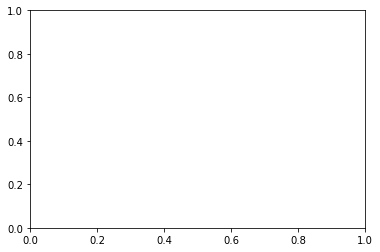

In [37]:
#call elbow plot
elbow_plot(X)

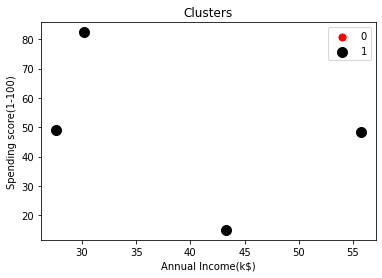

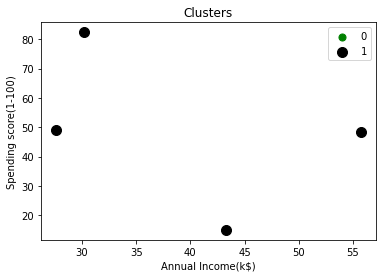

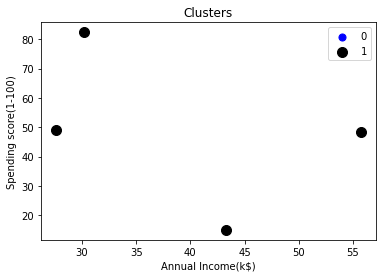

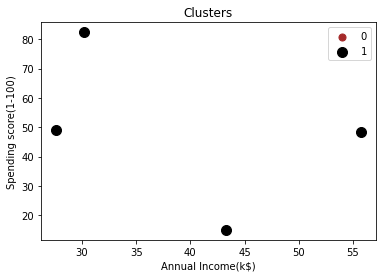

In [20]:
#Creating clustering model
k_values = 4
model = KMeans(n_clusters=k_values , random_state=0)
k_pred = model.fit(X)
#print(k_pred)
#function to visulaize the clustering
visualize_cluster(model,X,k_pred,k_values)